In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Target 
## build a data science project from scratch 
1. Get data ==>(image dataset from youtube videos) 
2. prepare the images 
3. build a CNN to classify the the images

# Get data 

#### The data is three videos, each video of which was filmed by a motorist in three capitals of different worlds, and they are as follows
1. [Cairo](https://youtu.be/86pZTI5gJQM) 
2. [Moscow](https://youtu.be/YORkrd05BtA)
3. [Paris](https://youtu.be/FBjjYw-xcdg?t=2)

In [2]:
# we need it download youtube videos 
! pip install  pytube

     |████████████████████████████████| 56 kB 265 kB/s            


In [3]:
# function to download videoes
from pytube import YouTube
def get_youtube_video(viedo_link):
    video = YouTube(viedo_link)
    stream = video.streams.get_highest_resolution()
    stream.download()
    print("Done !")

In [4]:
cairo_viedo=get_youtube_video('https://youtu.be/86pZTI5gJQM')
moscow_viedo=get_youtube_video('https://youtu.be/YORkrd05BtA') 
paris_viedo=get_youtube_video('https://youtu.be/FBjjYw-xcdg') 

Done !
Done !
Done !


In [5]:
! pwd

/kaggle/working


In [6]:
! ls

'Cairo 4K - Night Drive - Driving Downtown.mp4'
'Driving in Moscow 4K - Day and Night.mp4'
'Paris Drive 4K - Sunset Drive - France.mp4'
 __notebook__.ipynb


### finally we get it
#### We need at least one frame every second to avoid similar images or at least reduce distortion, but first let's create the folders for the data. Let's see the FPS of our videos

In [7]:
# viedo paths
cairo_viedo_path = '/kaggle/working/Cairo 4K - Night Drive - Driving Downtown.mp4'
moscow_viedo_path = '/kaggle/working/Driving in Moscow 4K - Day and Night.mp4'
paris_viedo_path = '/kaggle/working/Paris Drive 4K - Sunset Drive - France.mp4'
# save viedos in files 
cairo_viedo_offline=cv2.VideoCapture(cairo_viedo_path)
moscow_viedo_offline=cv2.VideoCapture(moscow_viedo_path) 
paris_viedo_offline=cv2.VideoCapture(paris_viedo_path)

# function to get Fps
def Get_viedo_info(video,name): #FPS , NO.Frames , Duration in sec
    framespersecond= video.get(cv2.CAP_PROP_FPS)
    totalNoFrames = video.get(cv2.CAP_PROP_FRAME_COUNT)
    durationInSeconds = float(totalNoFrames) / float(framespersecond)
    print("FPS in ", name ,"is ", framespersecond,' ,total number of frames in this is ',totalNoFrames,' and durtion is ',durationInSeconds)
    

In [8]:
cairo_fps=Get_viedo_info(cairo_viedo_offline,'cairo')
moscow_fps=Get_viedo_info(moscow_viedo_offline,'moscow')
paris_fps=Get_viedo_info(paris_viedo_offline,'paris')

FPS in  cairo is  29.97002997002997  ,total number of frames in this is  111386.0  and durtion is  3716.5795333333335
FPS in  moscow is  29.97002997002997  ,total number of frames in this is  88851.0  and durtion is  2964.6617
FPS in  paris is  30.0  ,total number of frames in this is  58116.0  and durtion is  1937.2


In [9]:
# Lets make folders for images and start to start work 

!mkdir /kaggle/working/Data

### I will prepare paths to split images as train , test and validation

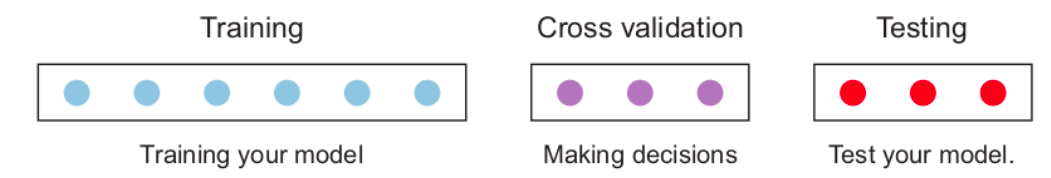

In [10]:
!mkdir /kaggle/working/Data/train/

In [11]:
!mkdir /kaggle/working/Data/train/cairo
!mkdir /kaggle/working/Data/train/moscow
!mkdir /kaggle/working/Data/train/paris

In [12]:
!mkdir /kaggle/working/Data/test/

In [13]:
!mkdir /kaggle/working/Data/test/cairo
!mkdir /kaggle/working/Data/test/moscow
!mkdir /kaggle/working/Data/test/paris

In [14]:
!mkdir /kaggle/working/Data/Val/

In [15]:
!mkdir /kaggle/working/Data/Val/cairo
!mkdir /kaggle/working/Data/Val/moscow
!mkdir /kaggle/working/Data/Val/paris

In [16]:
# i will back to Working path
! pwd
# i'm in it 😂😂

/kaggle/working


In [17]:
# deal with viedoes 
! pip install moviepy

     |████████████████████████████████| 388 kB 277 kB/s            
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 26.9 MB 387 kB/s             
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110744 sha256=f8f51f801aad4b568c11a28514c7b10f543c24302773a5989db2f369580fa998
  Stored in directory: /root/.cache/pip/wheels/56/dc/2b/9cd600d483c04af3353d66623056fc03faed76b7518faae4df
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6157 sha256=22dfd23a2925e27291772b68cc8c866842c328ae35b22d2f085edb02fd1b510c
  Stored in directory: /root/.cache/pip/wheels/12/36/1f/dc61e6ac10781d63cf6fa045eb09fa613a667384e12cb6e6e0
Successfully built moviepy proglog
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.0
    Uninstalling decorator-5.1.0:
      Successfully uninstalled decorator-5.1.0
ERROR: pip's dependency resolver does not currently tak

In [18]:
# I need to get small parts of videos because it will save me a lot of pictures
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def get_subvid_first_10M(video_input_path,video_output_path):
    ffmpeg_extract_subclip(video_input_path, 0, 600,
                           targetname=video_output_path)
    print('Done first 10 m from => ', video_input_path,' to ',video_output_path)

def get_subvid_last_10M(video_input_path,video_output_path):
    ffmpeg_extract_subclip(video_input_path, 1300, 1900,
                           targetname=video_output_path)
    print('Done last 10 m from => ', video_input_path,' to ',video_output_path)

def get_test_10M(video_input_path,video_output_path):
    ffmpeg_extract_subclip(video_input_path, 700, 900,
                           targetname=video_output_path)
    print('Done 10 m test from => ', video_input_path,' to ',video_output_path)
    
def get_val_10M(video_input_path,video_output_path):
    ffmpeg_extract_subclip(video_input_path, 600, 700,
                           targetname=video_output_path)
    print('Done 10 m val from => ', video_input_path,' to ',video_output_path)



In [19]:
# train _viedoes
# 1_ Cario

get_subvid_first_10M(cairo_viedo_path,'/kaggle/working/cario_train_first.mp4')
get_subvid_last_10M(cairo_viedo_path,'/kaggle/working/cario_train_last.mp4')

# 2_ Moscow ______________________________________________________________________________________    

get_subvid_first_10M(moscow_viedo_path,'/kaggle/working/moscow_train_first.mp4')
get_subvid_last_10M(moscow_viedo_path,'/kaggle/working/moscow_train_last.mp4')

# 3_ Paris ______________________________________________________________________________________    

get_subvid_first_10M(paris_viedo_path,'/kaggle/working/paris_train_first.mp4')
get_subvid_last_10M(paris_viedo_path,'/kaggle/working/paris_train_last.mp4')

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done first 10 m from =>  /kaggle/working/Cairo 4K - Night Drive - Driving Downtown.mp4  to  /kaggle/working/cario_train_first.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done last 10 m from =>  /kaggle/working/Cairo 4K - Night Drive - Driving Downtown.mp4  to  /kaggle/working/cario_train_last.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done first 10 m from =>  /kaggle/working/Driving in Moscow 4K - Day and Night.mp4  to  /kaggle/working/moscow_train_first.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done last 10 m from =>  /kaggle/working/Driving in Moscow 4K - Day and Night.mp4  to  /kaggle/working/moscow_train_last.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done first 10 m from =>  /kaggle/working/Paris Drive 4K - Sunset Drive - France.mp4  to  /kaggle/working/paris_train_first.mp4
Moviepy - Running:
>

In [20]:
# test _viedoes
# 1_ Cario

get_test_10M(cairo_viedo_path,'/kaggle/working/cario_test_first.mp4')

# 2_ Moscow ______________________________________________________________________________________    

get_test_10M(moscow_viedo_path,'/kaggle/working/moscow_test_first.mp4')

# 3_ Paris ______________________________________________________________________________________    

get_test_10M(paris_viedo_path,'/kaggle/working/paris_test_first.mp4')


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done 10 m test from =>  /kaggle/working/Cairo 4K - Night Drive - Driving Downtown.mp4  to  /kaggle/working/cario_test_first.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done 10 m test from =>  /kaggle/working/Driving in Moscow 4K - Day and Night.mp4  to  /kaggle/working/moscow_test_first.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done 10 m test from =>  /kaggle/working/Paris Drive 4K - Sunset Drive - France.mp4  to  /kaggle/working/paris_test_first.mp4


In [21]:
# val _viedoes
# 1_ Cario

get_val_10M(cairo_viedo_path,'/kaggle/working/cario_val_first.mp4')

# 2_ Moscow ______________________________________________________________________________________    

get_val_10M(moscow_viedo_path,'/kaggle/working/moscow_val_first.mp4')

# 3_ Paris ______________________________________________________________________________________    

get_val_10M(paris_viedo_path,'/kaggle/working/paris_val_first.mp4')


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done 10 m val from =>  /kaggle/working/Cairo 4K - Night Drive - Driving Downtown.mp4  to  /kaggle/working/cario_val_first.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done 10 m val from =>  /kaggle/working/Driving in Moscow 4K - Day and Night.mp4  to  /kaggle/working/moscow_val_first.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Done 10 m val from =>  /kaggle/working/Paris Drive 4K - Sunset Drive - France.mp4  to  /kaggle/working/paris_val_first.mp4


In [22]:
def get_image_per_seconde(sub_viedo_path,type_image,folder_name):
    viedo=cv2.VideoCapture(sub_viedo_path)
    success,image = viedo.read()
    count = 0
    while success:
        success,image = viedo.read()
#         print('Read a new frame: ', success)
        if count%30 == 0 :
            cv2.imwrite('/kaggle/working/Data/'+type_image+'/'+folder_name+'/'+folder_name+"_frame%d.jpg" % count, image) # save frame as JPEG file      
        count+=1   

In [23]:
# get_image_per_seconde('/kaggle/working/cario_train_first.mp4', 'Val' , 'cairo')


In [24]:
# train _viedoes

type_image='train'

# 1_ Cario

get_image_per_seconde('/kaggle/working/cario_train_first.mp4', type_image , 'cairo')
get_image_per_seconde('/kaggle/working/cario_train_last.mp4', type_image , 'cairo')


# 2_ Moscow ______________________________________________________________________________________    

get_image_per_seconde('/kaggle/working/moscow_train_first.mp4', type_image , 'moscow')
get_image_per_seconde('/kaggle/working/moscow_train_last.mp4', type_image , 'moscow')

# 3_ Paris ______________________________________________________________________________________    

get_image_per_seconde('/kaggle/working/paris_train_first.mp4', type_image , 'paris')
get_image_per_seconde('/kaggle/working/paris_train_last.mp4', type_image , 'paris')


In [25]:
# test_viedoes

type_image='test'

# 1_ Cario

get_image_per_seconde('/kaggle/working/cario_test_first.mp4', type_image , 'cairo')


# 2_ Moscow ______________________________________________________________________________________    

get_image_per_seconde('/kaggle/working/moscow_test_first.mp4', type_image , 'moscow')

# 3_ Paris ______________________________________________________________________________________    

get_image_per_seconde('/kaggle/working/paris_test_first.mp4', type_image , 'paris')


In [26]:
# val _viedoes

type_image='Val'

# 1_ Cario

get_image_per_seconde('/kaggle/working/cario_val_first.mp4', type_image , 'cairo')


# 2_ Moscow ______________________________________________________________________________________    

get_image_per_seconde('/kaggle/working/moscow_val_first.mp4', type_image , 'moscow')

# 3_ Paris ______________________________________________________________________________________    

get_image_per_seconde('/kaggle/working/paris_val_first.mp4', type_image , 'paris')
